# Import Libraries

In [15]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

# The XGboost model
from xgboost import XGBClassifier

# Scikit-learn for evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# --- Load the Processed Dataframe ---

In [16]:
processed_data_path = '../data/processed/combined_data.csv'

try:
    combined_df = pd.read_csv(processed_data_path, index_col = "Date", parse_dates = True)
    print("Combined DataFrame loaded successfully.")
except FileNotFoundError:
    print(f"Error: File {processed_data_path} not found. Please run the preprocessing notebook first.")

Combined DataFrame loaded successfully.


# --- Separate features (X) and target variable (y) ---

In [21]:
X = combined_df.drop("target", axis = 1)
y = combined_df["target"]

# --- Chronological data split ---
train_size = int(0.80 * len (combined_df))

X_train = X.iloc[:train_size]
X_test = X.iloc[train_size:]

y_train = y.iloc[:train_size]
y_test = y.iloc[train_size:]

print("\nData chronological split complete.")
print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")


Data chronological split complete.
Training set size: 2200
Test set size: 550


# --- Model instantiation and training (XGBoost) ---

In [23]:
# A basic XGBoost model is created with 'use_label_encoder' and 'eval_metric' to suppress warnings
model_xgb = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')

print("\nStarting XGBoost model training...")
model_xgb.fit(X_train, y_train)
print("XGBoost model training completed successfully!")

# --- Model evaluation ---
y_pred_xgb = model_xgb.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print("\n--- XGBoost Model Results ---")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1-Score: {f1_xgb:.4f}")


Starting XGBoost model training...
XGBoost model training completed successfully!

--- XGBoost Model Results ---
Accuracy: 0.5345
Precision: 0.4939
Recall: 0.4822
F1-Score: 0.4880


C:\Users\mathe\Documents\Alpha-Predictor\alpha_predictor_env\lib\site-packages\xgboost\training.py:183: UserWarning: [11:54:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


# --- Confusion Matrix visualization ---


Confusion Matrix:
[[172 125]
 [131 122]]


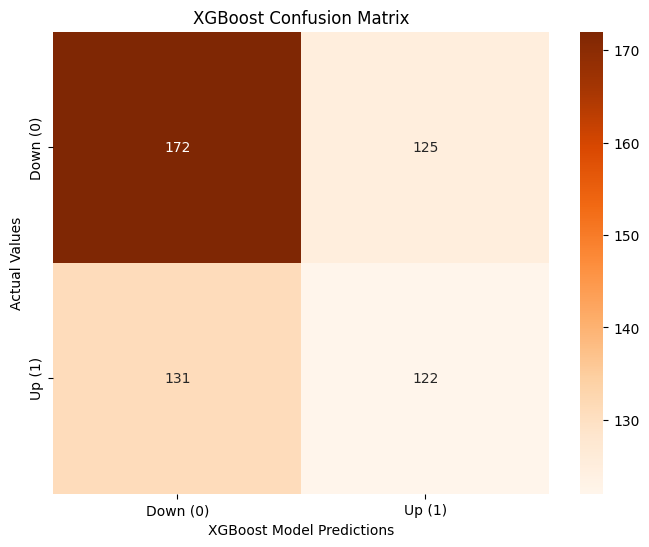


Trained XGBoost model successfully saved to: ../data/model/alpha_predictor_model_xgb.pkl


In [25]:
print("\nConfusion Matrix:")
print(conf_matrix_xgb)

conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Down (0)', 'Up (1)'],
            yticklabels=['Down (0)', 'Up (1)'])
plt.xlabel('XGBoost Model Predictions')
plt.ylabel('Actual Values')
plt.title('XGBoost Confusion Matrix')
plt.show()

# --- Saving the Model for production ---
model_output_path = "../data/model/"
model_filename_xgb = "alpha_predictor_model_xgb.pkl"
os.makedirs(model_output_path, exist_ok=True)
joblib.dump(model_xgb, os.path.join(model_output_path, model_filename_xgb))

print(f"\nTrained XGBoost model successfully saved to: {os.path.join(model_output_path, model_filename_xgb)}")